# GeneNetwork REST API Demo

![Binderlite](https://raw.githubusercontent.com/jgarte/binderlite-example/main/deploy-with-guix-badge.svg)

[notebook source code](https://git.genenetwork.org/jgart/genenetwork-jupyter-notebook-example)

In [14]:
import requests

from pprint import pprint

## Fetching Datasets

In [15]:
data = requests.get("http://genenetwork.org/api/v_pre1/species")
pprint(data.json())

[{'FullName': 'Mus musculus', 'Id': 1, 'Name': 'mouse', 'TaxonomyId': 10090},
 {'FullName': 'Rattus norvegicus', 'Id': 2, 'Name': 'rat', 'TaxonomyId': 10116},
 {'FullName': 'Arabidopsis thaliana',
  'Id': 3,
  'Name': 'arabidopsis',
  'TaxonomyId': 3702},
 {'FullName': 'Homo sapiens', 'Id': 4, 'Name': 'human', 'TaxonomyId': 9606},
 {'FullName': 'Hordeum vulgare', 'Id': 5, 'Name': 'barley', 'TaxonomyId': 4513},
 {'FullName': 'Drosophila melanogaster',
  'Id': 6,
  'Name': 'drosophila',
  'TaxonomyId': 7227},
 {'FullName': 'Macaca mulatta',
  'Id': 7,
  'Name': 'macaque monkey',
  'TaxonomyId': 9544},
 {'FullName': 'Glycine max', 'Id': 8, 'Name': 'soybean', 'TaxonomyId': 3847},
 {'FullName': 'Solanum lycopersicum',
  'Id': 9,
  'Name': 'tomato',
  'TaxonomyId': 4081},
 {'FullName': 'Populus trichocarpa',
  'Id': 10,
  'Name': 'poplar',
  'TaxonomyId': 3689},
 {'FullName': 'Oryzias latipes (Japanese medaka)',
  'Id': 11,
  'Name': 'Oryzias latipes',
  'TaxonomyId': 8090}]


## Getting information about a single species


In [16]:
data = requests.get("http://genenetwork.org/api/v_pre1/species/mouse")
print(data.json())

{'FullName': 'Mus musculus', 'Id': 1, 'Name': 'mouse', 'TaxonomyId': 10090}


## Fetching Genotypes for Group/RISet


In [17]:
api = 'http://genenetwork.org/api/v_pre1/genotypes/bimbam/BXD'

response = requests.get(api)

if response.status_code != 200:
    print('Failed to get data:', response.status_code)
else:
    print("Group/RISet Genotype Data: ")
    print(response.text[:50000])

Group/RISet Genotype Data: 
rs31443144,X,Y,0,0,0.5,0.5,0.5,0,0,0.5,0,0,0.5,0.5,0,0.5,0.5,0.5,0.5,0,0,0,0.5,0,0.5,0.5,0,0,0,0,0,0,0,0,0,0.5,0,0.5,0,0,0.5,0,0,0,0.5,0.5,0,0.5,0,0,0,0.5,0,0,0.5,0.5,0.5,0.5,0.5,0,0.5,0,0,0.5,0,0,0,0,0.5,0.5,0.5,0,0.5,0,0.5,0.5,0.5,0,0,0,0.5,0.5,0,0.5,0,0,0.5,0,0.5,0.5,0,0,0,0,0,1,0.5,0,0.5,0,1,0.5,0,0.5,0.5,0.5,0,0,0.5,1,0,0,1,0.5,0,0,0.5,0.5,0,0,0,0.5,0,0,0,1,0.5,0.5,0.5,0.5,0,0,0,0,0.5,0.5,0,0.5,0,0.5,0.5,0.5,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,0,0,0,0,0,0.5,0,0.5,0.5,0,0.5,0,0.5,0,0,0.5,0.5,0,0,1,0,0,0,0.5,0.5,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,1,1,0,0.5,0,0.5,0.5,0,1,0.5,0,1,1,0.5,NA,0,0,0,1,0.5,0.5,1,0,1,1,1,0,1,0,1,1,0.5,0.5,0,1,0.5,0.5,1,0.5,0.5,0,0.5,0,0,1,1,1,0,1,1,1
rs6269442,X,Y,0,0,0.5,0.5,0.5,0,0,0.5,0,0,0.5,0.5,0,0.5,0.5,0.5,0.5,0,0,0,0.5,0,0.5,0.5,0,0,0,0,0,0,0,0,0,0.5,0,0.5,0,0,0.5,0,0,0,0.5,0.5,0,0.5,0,0,0,0.5,0,0,0.5,0.5,0.5,0.5,0.5,0,0.5,0,0,0.5,0,0,0,0,0.5,0.5,0.5,0,0.5,0,0.5,0.5,0.5,0,0,0,0.5,0.5,0,0.5,0,0,0.5,0,0.5,0.5,0,0,0,0,0,1,0.5,0,

## Plotting Datasets Declaratively with glom

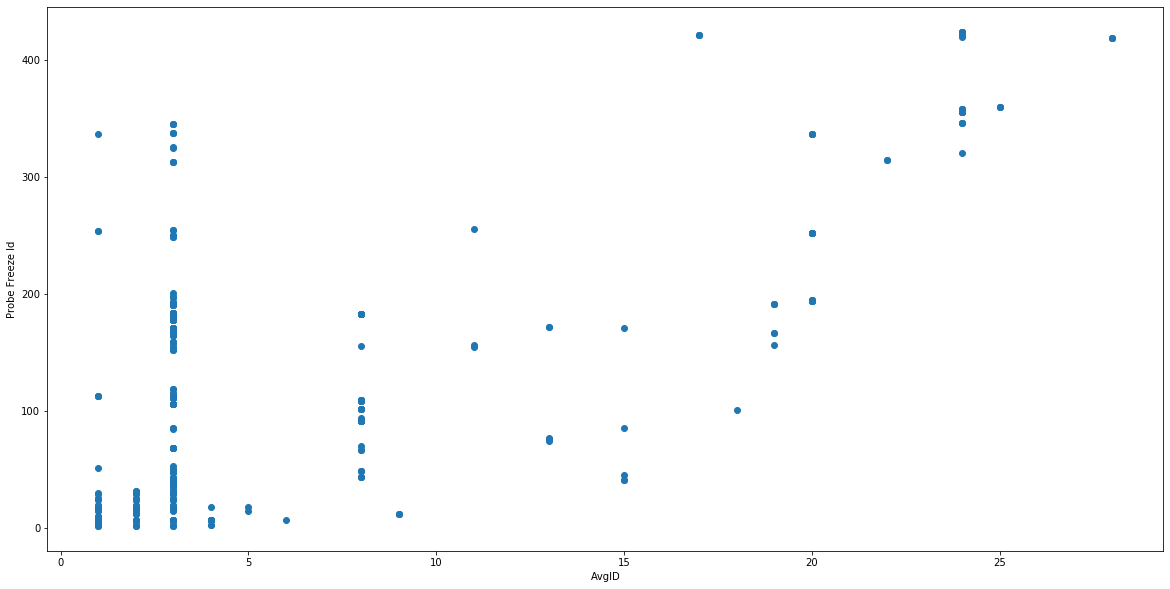

In [32]:
import json

from glom import glom
import pandas as pd
import matplotlib.pyplot as plt

r = requests.get("http://genenetwork.org/api/v_pre1/datasets/bxd")

input_data = r.json()

spec = [{"AvgID": "AvgID", 
        "Probe Freeze Id": "ProbeFreezeId"}]

output_data = glom(input_data, spec)

df = pd.DataFrame(output_data,columns=['AvgID','Probe Freeze Id'])

x = df['AvgID']
y = df['Probe Freeze Id']

plt.figure(figsize=(20,10))
plt.xlabel("AvgID")
plt.ylabel("Probe Freeze Id")
plt.scatter(x, y)
plt.show()
